In [483]:
import os
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model, svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

from sklearn.ensemble import RandomForestClassifier

## Задание 1

In [117]:
conn = psycopg2.connect(
    host="localhost",
    database="innopolis",
    user=os.environ['DB_USERNAME'],
    password=os.environ['DB_PASSWORD']
)

df = pd.read_sql_query("SELECT * FROM public.dataset;", con=conn)

cur.close()
conn.close()

/tmp/ipykernel_27300/2878619563.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM public.dataset;", con=conn)


In [118]:
df.head()

,Column1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697426,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [119]:
df.describe()

,Column1,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000
mean,6152.000000,27.084518,200.611602,100.369926,51.290532,8.172775,3.559155,1.813986,-2.255733,0.054473,0.141014,0.184891,0.511060,0.131358
std,3552.291866,4.335868,9.146321,12.477150,25.095909,5.974957,2.483550,1.794155,12.673254,0.043599,0.062704,0.053390,0.101163,0.094483
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3076.000000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.480000,0.066000
50%,6152.000000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.041000,0.131000,0.181000,0.524000,0.103000
75%,9228.000000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.217000,0.561000,0.178000
max,12304.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


## Задание 2

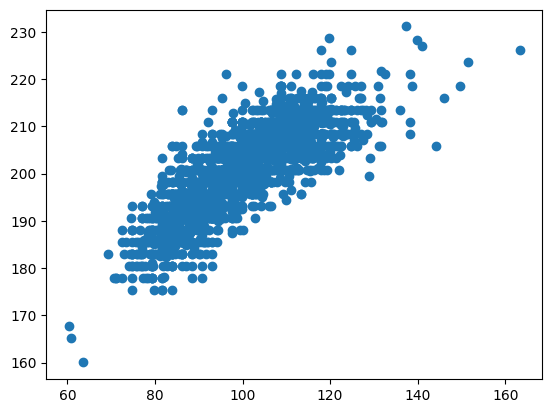

In [124]:
height_weight = df[['player_name', 'player_height', 'player_weight']].groupby(by='player_name').mean()
X = height_weight['player_weight'].to_numpy()
y = height_weight['player_height'].to_numpy()

plt.scatter(X, y)

/home/bob1ch/Рабочий стол/DS_course/Аттестация1/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


models score:
linear 0.6838201619125086
logistic 0.14073071718538566
svm 0.6756064048154695


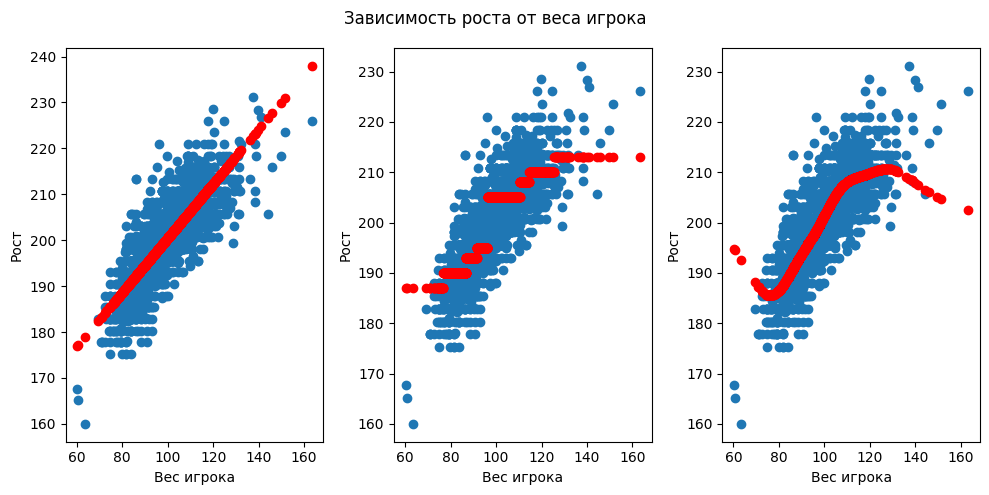

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model_linear = linear_model.LinearRegression().fit(X_train.reshape(-1, 1), y_train)
model_logistic = linear_model.LogisticRegression(max_iter=500).fit(X_train.reshape(-1, 1), y_train.astype(int)) #чем выше max_iter тем более гладкой получается линия
model_svm = svm.SVR().fit(X_train.reshape(-1, 1), y_train)

models_dict = {'linear': model_linear, 'logistic': model_logistic, 'svm': model_svm}

print('models score:')
for name, model in models_dict.items():
    if name == 'logistic':
        print(name, model.score(X_test.reshape(-1, 1), y_test.astype(int)))
        continue
    print(name, model.score(X_test.reshape(-1, 1), y_test))

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
(ax1, ax2, ax3) = axs

fig.suptitle('Зависимость роста от веса игрока')

ax1.scatter(X, y)
ax2.scatter(X, y)
ax3.scatter(X, y)

ax1.scatter(X, model_linear.predict(X.reshape(-1, 1)), c='r')
ax2.scatter(X, model_logistic.predict(X.reshape(-1, 1)), c='r')
ax3.scatter(X, model_svm.predict(X.reshape(-1, 1)), c='r')

for ax in axs.flat:
    ax.set(xlabel='Вес игрока', ylabel='Рост')

plt.tight_layout()

## Задание 3

In [469]:
df_train = df[['pts', 'reb', 'ast', 'player_height', 'player_weight', 'team_abbreviation', 'season']]\
                .loc[df.season.str[:4] != '2010']\
                .groupby(by=['season', 'team_abbreviation'], as_index=False).mean()
#Выборка для обучения дерева будет делиться на трейн и тест
#Нам очень невыгодно, чтобы выборка с сезоном 2010-2011 попала в трейн
#При попадании в трейн дерево просто запоминает ответы для этого сезона и тогда смысла в проверке на этом сезоне не будет
#test у нас очень маленький и состоит из одного сезона 2010-2011
#Надеюсь, что достаточно полно описал логику своих решений
#Из-за маленького размера получившегося датасета будем применять поиск по сетке с кроссвалидацией
X = df_train[['pts', 'reb', 'ast', 'player_height', 'player_weight']]
y = df_train['team_abbreviation']
encoder = LabelEncoder().fit(y)
y = encoder.transform(y)

In [470]:
df_2010_2011 = df[['pts', 'reb', 'ast', 'player_height', 'player_weight', 'team_abbreviation']]\
                .loc[df.season.str[:4] == '2010']\
                .groupby(by='team_abbreviation', as_index=False).mean()
X_test = df_2010_2011[['pts', 'reb', 'ast', 'player_height', 'player_weight']]
y_test = encoder.transform(df_2010_2011['team_abbreviation'])

In [471]:
model = DecisionTreeClassifier(random_state=14).fit(X, y)

In [472]:
print(f"""score(accuracy) модели на трейне: {model.score(X, y)}
score(accuracy) модели на тесте: {model.score(X_test, y_test)}
кол-во листьев: {model.get_n_leaves()}
глубина: {model.get_depth()}""")

score(accuracy) модели на трейне: 1.0
score(accuracy) модели на тесте: 0.1
кол-во листьев: 560
глубина: 23


Попробуем поиск по сетке 

In [473]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 14,
 'splitter': 'best'}

In [474]:
modelCV = DecisionTreeClassifier(random_state=14)
param_grid = {'max_depth': [3, 5, 10, 15, 20, 23], 
              'min_samples_split': [2, 5, 10, 15], 
              'min_samples_leaf': [1, 2, 5],}
sh = HalvingGridSearchCV(modelCV, param_grid, cv=10, factor=3, random_state=1744).fit(X, y)
modelCV = sh.best_estimator_
print(sh.best_estimator_)

/home/bob1ch/Рабочий стол/DS_course/Аттестация1/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=10,
                       random_state=14)


In [475]:
print(f"""score(accuracy) модели на трейне: {modelCV.score(X, y)}
score(accuracy) модели на тесте: {modelCV.score(X_test, y_test)}
кол-во листьев: {modelCV.get_n_leaves()}
глубина: {modelCV.get_depth()}""")

score(accuracy) модели на трейне: 0.42318059299191374
score(accuracy) модели на тесте: 0.06666666666666667
кол-во листьев: 135
глубина: 15


## Задание 4

In [488]:
df_train2= df[['age', 'pts', 'reb', 'ast', 'player_height', 'player_weight', 'country']]
X = df_train2[['age', 'pts', 'reb', 'ast', 'player_height', 'player_weight']]
y = df_train2['country']
encoder = LabelEncoder().fit(y)
y = encoder.transform(y)

In [489]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [490]:
model = DecisionTreeClassifier().fit(X_train, y_train)

In [491]:
print(f"""score(accuracy) модели на трейне: {model.score(X_train, y_train)}
score(accuracy) модели на тесте: {model.score(X_test, y_test)}
кол-во листьев: {model.get_n_leaves()}
глубина: {model.get_depth()}""")

score(accuracy) модели на трейне: 1.0
score(accuracy) модели на тесте: 0.7764055898602535
кол-во листьев: 1874
глубина: 29


Попробуем улучшить скор при помощи поиска по сетке

In [492]:
modelCV = DecisionTreeClassifier()
param_grid = {'max_depth': [3, 5, 10, 20, 30], 
              'min_samples_split': [2, 5, 10, 15], 
              'min_samples_leaf': [1, 2, 5], 
              'criterion': ['gini', 'entropy']}
sh = HalvingGridSearchCV(modelCV, param_grid, cv=10, factor=3).fit(X_test, y_test)
modelCV = sh.best_estimator_
print(sh.best_estimator_)

/home/bob1ch/Рабочий стол/DS_course/Аттестация1/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


DecisionTreeClassifier(max_depth=3)


In [493]:
print(f"""score(accuracy) модели на трейне: {modelCV.score(X_train, y_train)}
score(accuracy) модели на тесте: {modelCV.score(X_test, y_test)}
кол-во листьев: {modelCV.get_n_leaves()}
глубина: {modelCV.get_depth()}""")

score(accuracy) модели на трейне: 0.8347420892934547
score(accuracy) модели на тесте: 0.8446538836529087
кол-во листьев: 8
глубина: 3


Попробуем ещё случайный лес

In [494]:
forest = RandomForestClassifier()

param_grid = {'max_depth': [3, 5, 10, 20, 30], 
              'min_samples_split': [2, 5, 10, 15], 
              'min_samples_leaf': [1, 2, 5], 
              'criterion': ['gini', 'entropy']}

sh = HalvingGridSearchCV(forest, 
                         param_grid, 
                         cv=10, 
                         factor=3, 
                         resource='n_estimators', 
                         max_resources=30).fit(X_test, y_test)
forest = sh.best_estimator_
print(sh.best_estimator_)
print(f"""score(accuracy) модели на трейне: {forest.score(X_train, y_train)}
score(accuracy) модели на тесте: {forest.score(X_test, y_test)}""")

/home/bob1ch/Рабочий стол/DS_course/Аттестация1/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/bob1ch/Рабочий стол/DS_course/Аттестация1/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/bob1ch/Рабочий стол/DS_course/Аттестация1/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/bob1ch/Рабочий стол/DS_course/Аттестация1/venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


RandomForestClassifier(max_depth=5, min_samples_split=15, n_estimators=27)
score(accuracy) модели на трейне: 0.8362592110966623
score(accuracy) модели на тесте: 0.8423789405264869


Сильнее победить не получилось)